#LOADING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/ADMIN/Desktop/Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#FINDING MISSING VALUES 

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#NUMBER OF MALES AND FEMALES FROM THE GIVEN GEOGRAPHY

In [7]:
data.groupby('Geography')['Gender'].value_counts()

Geography  Gender
France     Male      2753
           Female    2261
Germany    Male      1316
           Female    1193
Spain      Male      1388
           Female    1089
Name: count, dtype: int64

#GENDER OF THE ACTIVE MEMBERS THAT EXISTED

In [8]:
data.groupby('Gender')[['IsActiveMember','Exited']].sum()

,IsActiveMember,Exited
Gender,,
Female,2284,1139
Male,2867,898


#STATUS OF THE MEMBERS EXITED BASED ON GEOGRAPHY

In [9]:
data.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: count, dtype: int64

#ENCODING SOME COLUMNS

In [10]:
from sklearn.preprocessing import LabelEncoder
enco=LabelEncoder()
data['Geography']=enco.fit_transform(data['Geography'])
data['Gender']=enco.fit_transform(data['Gender'])

#DATA VISUALIZATION

Text(0.5, 1.0, 'Geography Based on Members that Exited')

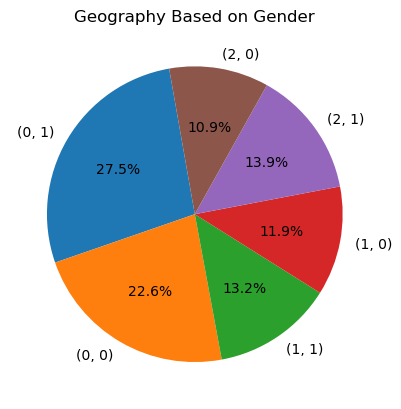

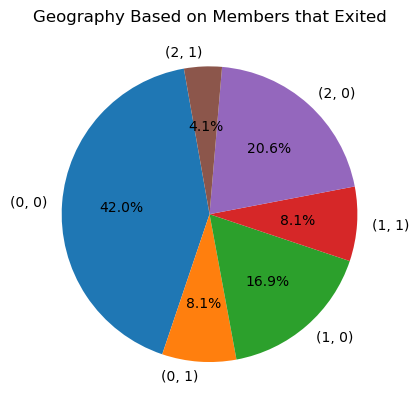

In [11]:
plt.figure(0)
count=data.groupby('Geography')['Gender'].value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%',startangle=100)
plt.title("Geography Based on Gender")

plt.figure(1)
count=data.groupby('Geography')['Exited'].value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%',startangle=100)
plt.title("Geography Based on Members that Exited")



#SPLITTING TRAIN AND TEST DATASET

In [12]:
x=data.drop(['RowNumber','Surname'],axis=1)
y=data['Exited']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

#BUILDING A LOGISTIC REGRESSION AND CHECKING THE MODEL ACCURACY

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [16]:
yhat=lr.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score
print('Accuracy :', accuracy_score(y_test,yhat))

Accuracy : 1.0


#BUILDING A SUPPORT VENDOR MACHINE MODEL AND CHECKING ITS ACCURACY

In [18]:
from sklearn import svm
c2=svm.SVC(kernel='linear')
c2.fit(x_train,y_train)
yhat2=c2.predict(x_test)
print('Accuracy:',accuracy_score(y_test,yhat2))

Accuracy: 1.0


#BUILDING A RANDOMFOREST MODEL AND CHECKING ITS ACCURACY

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
yhat3=rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,yhat3))

Accuracy: 1.0


#BUILDING ADABOOST MODEL AND CHECKINH ITS ACCURACY

In [20]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
yhat4=ada.predict(x_test)
print("Accuracy :",accuracy_score(y_test,yhat4))

Accuracy : 1.0


In [21]:
#BUILDING A XGB MODEL AND CHECKING ITS ACCURACY

In [22]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
yhat5=xgb.predict(x_test)
print("Accuracy :",accuracy_score(y_test,yhat5))

Accuracy : 1.0


#BUILDING A KNN MODEL ANDCHECKING ITS ACCURACY

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
yhat6=knn.predict(x_test)
print("Accuracy :",accuracy_score(y_test,yhat6))

Accuracy : 1.0


#CONCLUSION


-THE MODELS HAD AN ACCURACY OF 100% THEREFORE OUR MODELS GAVE THE BEST RESULTS